In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
import sklearn.metrics as skm
import pickle

In [2]:
df = pd.read_csv("E:/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df.shape

(159571, 8)

In [4]:
df = df.iloc[0:10000]
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,1a790ff1007a10e3,Numbers may be either listed separately at the...,0,0,0,0,0,0
9996,1a7a4868968e2b9e,"Those two love to disagree, don't they? 206.17...",0,0,0,0,0,0
9997,1a7c3bec9a71415d,"""I have changed """"Lance Thomas"""" to """"Lance Th...",0,0,0,0,0,0
9998,1a7c9c14b0cf0fe0,states \n\nCourts: I have been putting all art...,0,0,0,0,0,0


In [5]:
df.shape

(10000, 8)

In [6]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
y = df.drop("comment_text",axis=1).drop("id",axis=1)
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


In [8]:
X = df.comment_text
X

0       Explanation\nWhy the edits made under my usern...
1       D'aww! He matches this background colour I'm s...
2       Hey man, I'm really not trying to edit war. It...
3       "\nMore\nI can't make any real suggestions on ...
4       You, sir, are my hero. Any chance you remember...
                              ...                        
9995    Numbers may be either listed separately at the...
9996    Those two love to disagree, don't they? 206.17...
9997    "I have changed ""Lance Thomas"" to ""Lance Th...
9998    states \n\nCourts: I have been putting all art...
9999    Will do buddy ). But what is this thing about ...
Name: comment_text, Length: 10000, dtype: object

In [9]:
X = X.str.lower()
X

0       explanation\nwhy the edits made under my usern...
1       d'aww! he matches this background colour i'm s...
2       hey man, i'm really not trying to edit war. it...
3       "\nmore\ni can't make any real suggestions on ...
4       you, sir, are my hero. any chance you remember...
                              ...                        
9995    numbers may be either listed separately at the...
9996    those two love to disagree, don't they? 206.17...
9997    "i have changed ""lance thomas"" to ""lance th...
9998    states \n\ncourts: i have been putting all art...
9999    will do buddy ). but what is this thing about ...
Name: comment_text, Length: 10000, dtype: object

In [10]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
X = X.apply(lambda x:decontracted(x))
X

0       explanation\nwhy the edits made under my usern...
1       d'aww! he matches this background colour i am ...
2       hey man, i am really not trying to edit war. i...
3       "\nmore\ni can not make any real suggestions o...
4       you, sir, are my hero. any chance you remember...
                              ...                        
9995    numbers may be either listed separately at the...
9996    those two love to disagree, do not they? 206.1...
9997    "i have changed ""lance thomas"" to ""lance th...
9998    states \n\ncourts: i have been putting all art...
9999    will do buddy ). but what is this thing about ...
Name: comment_text, Length: 10000, dtype: object

In [11]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 'article', 'please', 'talk', 'wikipedia', 'one', 'utc', 'see', 'user', 'redirect', 'question', 'image'
                'stop', 'need', 'seem', 'welcome', 'link', 'use', 'page', 'thank', 'made', 'hello', 'know', 'back', 'much',
               'right', 'section', 'people', 'hi', 'may', 'said', 'list', 'well', 'read', 'u', 'agree', 'help', 'really',
               'name', 'deletion', 'hey', 'say', 'someone', 'want', 'look', 'edit', 'make', 'comment', 'source', 'think',
               'time', 'still', 'editing', 'sure', 'delete', 'work', 'july', 'add', 'okay', 'dont', 'way', 'another']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(X):
    X = " ".join([word for word in str(X).split() if word not in STOPWORDS])
    return X
X = X.apply(lambda x:cleaning_stopwords(x))
X

0       explanation edits username hardcore metallica ...
1       d'aww! matches background colour seemingly stu...
2       man, not trying war. guy constantly removing r...
3       " not real suggestions improvement - wondered ...
4                     you, sir, hero. chance remember on?
                              ...                        
9995    numbers either listed separately beginning, st...
9996         two love disagree, not they? 206.170.111.187
9997    "i changed ""lance thomas"" ""lance thomas"" a...
9998    states courts: putting articles dealing state ...
9999                buddy ). but thing nottingham about??
Name: comment_text, Length: 10000, dtype: object

In [12]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(X):
    translator = str.maketrans('', '', punctuations_list)
    return X.translate(translator)
X= X.apply(lambda x: cleaning_punctuations(x))
X

0       explanation edits username hardcore metallica ...
1       daww matches background colour seemingly stuck...
2       man not trying war guy constantly removing rel...
3        not real suggestions improvement  wondered st...
4                         you sir hero chance remember on
                              ...                        
9995    numbers either listed separately beginning stu...
9996              two love disagree not they 206170111187
9997    i changed lance thomas lance thomas american p...
9998    states courts putting articles dealing state l...
9999                    buddy  but thing nottingham about
Name: comment_text, Length: 10000, dtype: object

In [13]:
def cleaning_URLs(X):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',X)
X = X.apply(lambda x: cleaning_URLs(x))
X

0       explanation edits username hardcore metallica ...
1       daww matches background colour seemingly stuck...
2       man not trying war guy constantly removing rel...
3        not real suggestions improvement  wondered st...
4                         you sir hero chance remember on
                              ...                        
9995    numbers either listed separately beginning stu...
9996              two love disagree not they 206170111187
9997    i changed lance thomas lance thomas american p...
9998    states courts putting articles dealing state l...
9999                    buddy  but thing nottingham about
Name: comment_text, Length: 10000, dtype: object

In [14]:
def cleaning_numbers(X):
    return re.sub('[0-9]+', '', X)
X = X.apply(lambda x: cleaning_numbers(x))
X

0       explanation edits username hardcore metallica ...
1       daww matches background colour seemingly stuck...
2       man not trying war guy constantly removing rel...
3        not real suggestions improvement  wondered st...
4                         you sir hero chance remember on
                              ...                        
9995    numbers either listed separately beginning stu...
9996                          two love disagree not they 
9997    i changed lance thomas lance thomas american p...
9998    states courts putting articles dealing state l...
9999                    buddy  but thing nottingham about
Name: comment_text, Length: 10000, dtype: object

In [15]:
tokenizer = RegexpTokenizer('\s+', gaps=True)
X = X.apply(lambda x:tokenizer.tokenize(x))
X

0       [explanation, edits, username, hardcore, metal...
1       [daww, matches, background, colour, seemingly,...
2       [man, not, trying, war, guy, constantly, remov...
3       [not, real, suggestions, improvement, wondered...
4                  [you, sir, hero, chance, remember, on]
                              ...                        
9995    [numbers, either, listed, separately, beginnin...
9996                     [two, love, disagree, not, they]
9997    [i, changed, lance, thomas, lance, thomas, ame...
9998    [states, courts, putting, articles, dealing, s...
9999               [buddy, but, thing, nottingham, about]
Name: comment_text, Length: 10000, dtype: object

In [16]:
lm = WordNetLemmatizer()
def lemmatization(X):
    X = [lm.lemmatize(word) for word in X]
    return X
X = X.apply(lambda x: lemmatization(x))
X

0       [explanation, edits, username, hardcore, metal...
1       [daww, match, background, colour, seemingly, s...
2       [man, not, trying, war, guy, constantly, remov...
3       [not, real, suggestion, improvement, wondered,...
4                  [you, sir, hero, chance, remember, on]
                              ...                        
9995    [number, either, listed, separately, beginning...
9996                     [two, love, disagree, not, they]
9997    [i, changed, lance, thomas, lance, thomas, ame...
9998    [state, court, putting, article, dealing, stat...
9999               [buddy, but, thing, nottingham, about]
Name: comment_text, Length: 10000, dtype: object

In [17]:
len(X)

10000

In [18]:
P=[]
for i in range(0,len(X)):
    Q=(len(X[i]))
    P.append(Q)

In [19]:
P

[22,
 11,
 18,
 45,
 6,
 5,
 3,
 7,
 36,
 4,
 219,
 7,
 26,
 68,
 19,
 58,
 7,
 4,
 12,
 38,
 20,
 6,
 42,
 6,
 124,
 13,
 23,
 32,
 13,
 8,
 8,
 5,
 6,
 52,
 24,
 75,
 118,
 31,
 11,
 89,
 19,
 16,
 57,
 5,
 24,
 71,
 5,
 10,
 61,
 108,
 276,
 18,
 14,
 51,
 5,
 13,
 7,
 55,
 164,
 36,
 11,
 28,
 3,
 84,
 15,
 23,
 11,
 13,
 21,
 16,
 17,
 28,
 5,
 105,
 15,
 7,
 19,
 24,
 20,
 8,
 70,
 248,
 50,
 18,
 11,
 9,
 9,
 4,
 29,
 2,
 65,
 40,
 4,
 8,
 41,
 42,
 4,
 12,
 14,
 15,
 10,
 8,
 8,
 31,
 10,
 5,
 61,
 53,
 11,
 16,
 8,
 6,
 53,
 37,
 139,
 5,
 44,
 6,
 27,
 4,
 18,
 18,
 20,
 14,
 12,
 12,
 792,
 15,
 24,
 44,
 24,
 15,
 29,
 16,
 54,
 17,
 9,
 15,
 3,
 5,
 79,
 32,
 161,
 27,
 8,
 55,
 4,
 15,
 39,
 33,
 66,
 50,
 6,
 41,
 8,
 20,
 12,
 28,
 18,
 7,
 372,
 25,
 208,
 10,
 13,
 10,
 60,
 61,
 10,
 25,
 28,
 5,
 42,
 4,
 14,
 3,
 11,
 0,
 7,
 68,
 95,
 5,
 7,
 30,
 11,
 11,
 13,
 7,
 21,
 16,
 28,
 30,
 26,
 6,
 6,
 24,
 23,
 54,
 42,
 9,
 47,
 32,
 10,
 22,
 56,
 27,
 48,
 34,
 7,

In [20]:
type(X)

pandas.core.series.Series

In [21]:
X

0       [explanation, edits, username, hardcore, metal...
1       [daww, match, background, colour, seemingly, s...
2       [man, not, trying, war, guy, constantly, remov...
3       [not, real, suggestion, improvement, wondered,...
4                  [you, sir, hero, chance, remember, on]
                              ...                        
9995    [number, either, listed, separately, beginning...
9996                     [two, love, disagree, not, they]
9997    [i, changed, lance, thomas, lance, thomas, ame...
9998    [state, court, putting, article, dealing, stat...
9999               [buddy, but, thing, nottingham, about]
Name: comment_text, Length: 10000, dtype: object

In [22]:
A = X.to_string()
A

'0       [explanation, edits, username, hardcore, metal...\n1       [daww, match, background, colour, seemingly, s...\n2       [man, not, trying, war, guy, constantly, remov...\n3       [not, real, suggestion, improvement, wondered,...\n4                  [you, sir, hero, chance, remember, on]\n5                   [congratulation, well, tool, well, ·]\n6                              [cocksucker, piss, around]\n7       [vandalism, matt, shirvington, reverted, not, ...\n8       [sorry, word, nonsense, offensive, you, anyway...\n9               [alignment, subject, contrary, dulithgow]\n10      [fair, rationale, imagewonjujpg, thanks, uploa...\n11          [bbq, man, let, discus, itmaybe, over, phone]\n12      [hey, it, it, exclusive, group, wp, talibanswh...\n13      [start, throwing, accusation, warning, me, let...\n14      [oh, girl, started, argument, me, stuck, nose,...\n15      [juelz, santanas, age, juelz, santana, year, o...\n16          [bye, not, look, come, comming, back, tosse

In [23]:
data = " ".join(A.split())
data

'0 [explanation, edits, username, hardcore, metal... 1 [daww, match, background, colour, seemingly, s... 2 [man, not, trying, war, guy, constantly, remov... 3 [not, real, suggestion, improvement, wondered,... 4 [you, sir, hero, chance, remember, on] 5 [congratulation, well, tool, well, ·] 6 [cocksucker, piss, around] 7 [vandalism, matt, shirvington, reverted, not, ... 8 [sorry, word, nonsense, offensive, you, anyway... 9 [alignment, subject, contrary, dulithgow] 10 [fair, rationale, imagewonjujpg, thanks, uploa... 11 [bbq, man, let, discus, itmaybe, over, phone] 12 [hey, it, it, exclusive, group, wp, talibanswh... 13 [start, throwing, accusation, warning, me, let... 14 [oh, girl, started, argument, me, stuck, nose,... 15 [juelz, santanas, age, juelz, santana, year, o... 16 [bye, not, look, come, comming, back, tosser] 17 [talkvoydan, pop, georgiev, chernodrinski] 18 [mitsurugi, point, no, sense, not, argue, incl... 19 [not, mean, bother, writing, something, regard... 20 [regarding, rec

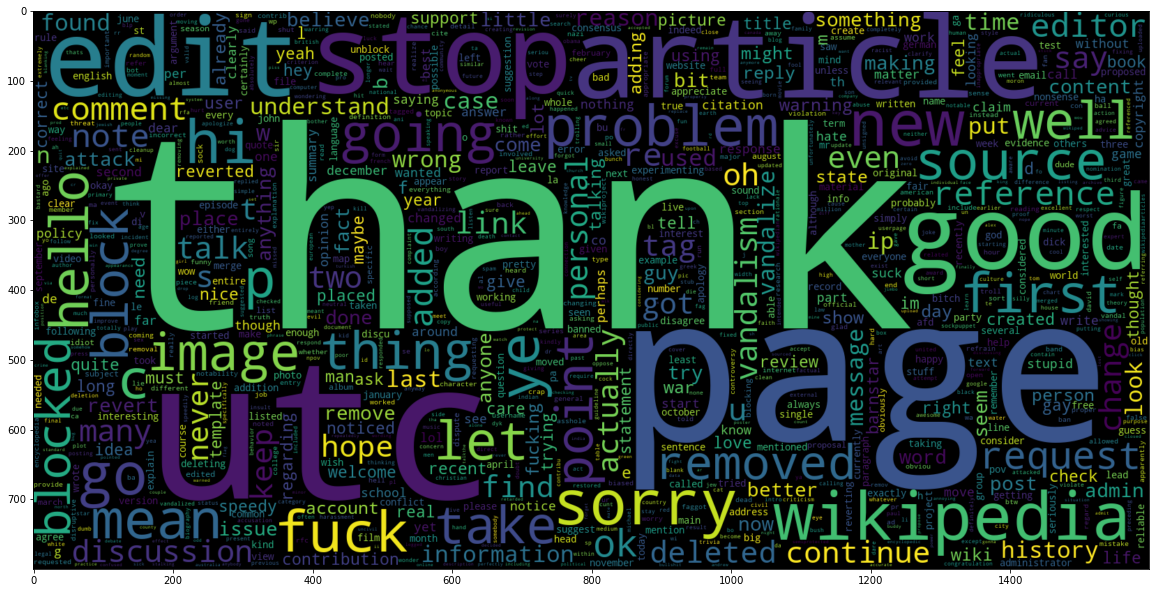

In [24]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(data)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis = ('off')
plt.show()

stopwordlist = ['article', 'please', 'talk', 'wikipedia', 'one', 'utc', 'see', 'user', 'redirect', 'question', 'image'
                'stop', 'need', 'seem', 'welcome', 'link', 'use', 'page', 'thank', 'made', 'hello', 'know', 'back', 'much',
               'right', 'section', 'people', 'hi', 'may', 'said', 'list', 'well', 'read', 'u', 'agree', 'help', 'really',
               'name', 'deletion', 'hey', 'say', 'someone', 'want', 'look', 'edit', 'make', 'comment', 'source', 'think',
               'time', 'still', 'editing', 'sure', 'delete', 'work', 'july', 'add', 'okay', 'dont', 'way', 'another']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(X):
    X = " ".join([word for word in str(X).split() if word not in STOPWORDS])
    return X
X = X.apply(lambda x:cleaning_stopwords(x))
X

In [25]:
def list_to_string(X):
    X = (' '.join(map(str, X)))
    return X
X = X.apply(lambda x: list_to_string(x))
X

0       explanation edits username hardcore metallica ...
1       daww match background colour seemingly stuck w...
2       man not trying war guy constantly removing rel...
3       not real suggestion improvement wondered stati...
4                         you sir hero chance remember on
                              ...                        
9995    number either listed separately beginning stuc...
9996                           two love disagree not they
9997    i changed lance thomas lance thomas american p...
9998    state court putting article dealing state law ...
9999                     buddy but thing nottingham about
Name: comment_text, Length: 10000, dtype: object

In [26]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


In [27]:
X

0       explanation edits username hardcore metallica ...
1       daww match background colour seemingly stuck w...
2       man not trying war guy constantly removing rel...
3       not real suggestion improvement wondered stati...
4                         you sir hero chance remember on
                              ...                        
9995    number either listed separately beginning stuc...
9996                           two love disagree not they
9997    i changed lance thomas lance thomas american p...
9998    state court putting article dealing state law ...
9999                     buddy but thing nottingham about
Name: comment_text, Length: 10000, dtype: object

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
vectorizer=TfidfVectorizer(analyzer='word', max_features=8000, ngram_range=(1,3), stop_words="english")

In [30]:
X_train = vectorizer.fit_transform(X_train)

In [31]:
X_train.shape

(8000, 8000)

In [32]:
X_test = vectorizer.transform(X_test)

In [33]:
X_test.shape

(2000, 8000)

In [34]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [35]:
def j_score(y_true, y_pred):
    jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
    return jaccard.mean()*100

def print_score(y_pred, classifier):
  print("Classifier: ",classifier.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test, y_pred)))
  print('----')
  print('Confusion Matrix: \n{}'.format(skm.classification_report(y_test, y_pred)))

In [36]:
classifier = OneVsRestClassifier(SVC(probability=True))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
skm.multilabel_confusion_matrix(y_test, y_pred)
print_score(y_pred, classifier)

Classifier:  OneVsRestClassifier
Jacard score: 25.191972076788833
----
Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.97      0.45      0.61       175
           1       0.00      0.00      0.00        29
           2       0.91      0.39      0.55       104
           3       0.00      0.00      0.00        10
           4       0.77      0.28      0.41        97
           5       0.00      0.00      0.00        11

   micro avg       0.91      0.34      0.50       426
   macro avg       0.44      0.19      0.26       426
weighted avg       0.80      0.34      0.48       426
 samples avg       0.04      0.03      0.03       426



C:\Users\91768\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91768\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91768\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
model=classifier

In [38]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(probability=True))

In [39]:
model.score(X_test,y_test)*100

91.45

In [40]:
pickle.dump(model, open('model.pkl', 'wb'))